# Artificial Intelligence

## Perceptron

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Perceptron update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

# Example usage
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([1, 0, 0, 0])

p = Perceptron(learning_rate=0.1, epochs=10)
p.fit(X, y)
print("Predictions:", p.predict(X))

Predictions: [1 0 0 0]


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron
p = Perceptron(learning_rate=0.01, epochs=1000)
p.fit(X_train, y_train)

# Evaluate
y_pred = p.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.63


## MLP

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate synthetic data
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, 1000)  # Binary labels

# Define the MLP model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")    

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4849 - loss: 0.7177 - val_accuracy: 0.5050 - val_loss: 0.7055
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5282 - loss: 0.6930 - val_accuracy: 0.5300 - val_loss: 0.6933
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5467 - loss: 0.6860 - val_accuracy: 0.5200 - val_loss: 0.6943
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5517 - loss: 0.6896 - val_accuracy: 0.5050 - val_loss: 0.6975
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5441 - loss: 0.6842 - val_accuracy: 0.4950 - val_loss: 0.6993
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5846 - loss: 0.6809 - val_accuracy: 0.4900 - val_loss: 0.7002
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5322 - loss: 0.6867 - val_accuracy: 0.5400 - val_loss: 0.6955
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5751 - loss: 0.6831 - val_accuracy: 0.4800 - val_loss

### Visualizing Training Progress

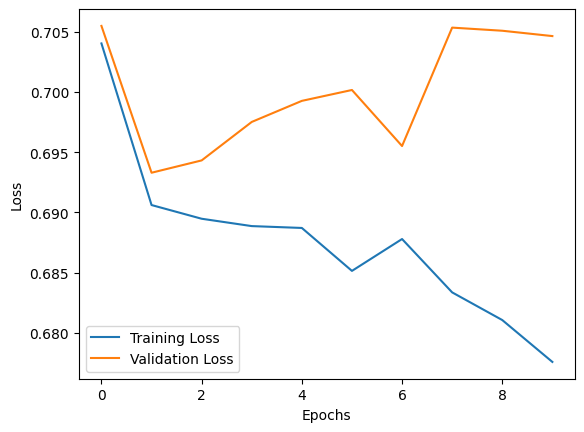

In [4]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Interpretation of the Training and Validation Loss Graph

#### **Graph Analysis**:
1. **Training Loss** (Blue Line):
   - The training loss decreases consistently across epochs.
   - This indicates that the model is effectively learning from the training data and optimizing its parameters to reduce the error.

2. **Validation Loss** (Orange Line):
   - Initially decreases in the first few epochs, which suggests that the model is generalizing well to unseen data during this phase.
   - After epoch 3-4, the validation loss begins to fluctuate and eventually increases slightly toward the end.

#### **Insights**:
1. **Early Generalization**:
   - During the initial epochs, the training and validation losses decrease simultaneously, showing good generalization.

2. **Overfitting Trend**:
   - The upward trend in validation loss after epoch 4, while the training loss continues to decrease, is a sign of overfitting. The model starts to memorize the training data rather than generalizing to the validation set.

#### **Key Observations**:
- The training loss is consistently lower than the validation loss, which is expected in most cases.
- The gap between the two losses widens after a few epochs, further indicating potential overfitting.

#### **Recommendations**:
1. **Early Stopping**:
   - Implement early stopping to halt training when the validation loss stops improving, which might occur around epoch 4.

2. **Regularization Techniques**:
   - Introduce dropout layers to prevent overfitting.
   - Apply L2 regularization to the weights in the dense layers.

3. **Data Augmentation**:
   - If applicable, augment the training data to enhance the model's ability to generalize.

4. **Validation Data**:
   - Ensure that the validation data is representative of the overall dataset to better assess the model's generalization performance.

This graph provides valuable insights into how the model learns and generalizes over epochs, and it highlights areas for potential optimization.

### Multiclass Classification

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Generate synthetic data
X, y = make_classification(n_samples=2000, n_features=20, n_classes=3, n_informative=15)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/20


C:\Users\vella\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5283 - loss: 1.0932 - val_accuracy: 0.8100 - val_loss: 0.4576
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8533 - loss: 0.3687 - val_accuracy: 0.8675 - val_loss: 0.3399
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9210 - loss: 0.2511 - val_accuracy: 0.9050 - val_loss: 0.2855
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9405 - loss: 0.1889 - val_accuracy: 0.8900 - val_loss: 0.2962
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9425 - loss: 0.1955 - val_accuracy: 0.9100 - val_loss: 0.2447
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9635 - loss: 0.1073 - val_accuracy: 0.9100 - val_loss: 0.2510
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9595 - loss: 0.1157 - val_accuracy: 0.9050 - val_loss: 0.2877
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 0.0870 - val_accuracy: 0.9175 - val_loss: 0.2547
Ep

### Visualizing the Training Process
Diagram: How Epochs, Batches, and Iterations Interact

Look at the `epoch.md` Markdown file

## Markov Decision Process (MDP)

Let’s solve a simple MDP using Value Iteration.

Problem: Grid World

A 3x3 grid with:

* Start: Top-left corner.

* Goal: Bottom-right corner.

* Reward: +1 at the goal, -0.1 for each step.

* Discount: 0.5

In [18]:
import numpy as np

# Define the MDP components
states = [(i, j) for i in range(3) for j in range(3)]
actions = ["up", "down", "left", "right"]
discount_factor = 0.5

# Rewards
rewards = {s: -0.1 for s in states}
rewards[(2, 2)] = 1

# Transition probabilities
def transition_probabilities(state, action):
    i, j = state
    if state == (2, 2):
        return [(state, 1.0)]
    
    if action == "up":
        next_state = (max(i - 1, 0), j)
    elif action == "down":
        next_state = (min(i + 1, 2), j)
    elif action == "left":
        next_state = (i, max(j - 1, 0))
    elif action == "right":
        next_state = (i, min(j + 1, 2))
    
    return [(next_state, 1.0)]

# Value Iteration
def value_iteration(states, actions, rewards, gamma, theta=1e-6):
    V = {s: 0 for s in states}  # Initialize value function
    while True:
        delta = 0
        new_V = V.copy()
        for state in states:
            if state == (2, 2):
                continue
            action_values = []
            for action in actions:
                value = 0
                for next_state, prob in transition_probabilities(state, action):
                    value += prob * (rewards[state] + gamma * V[next_state])
                action_values.append(value)
            new_V[state] = max(action_values)
            delta = max(delta, abs(new_V[state] - V[state]))
        V = new_V
        if delta < theta:
            break
    return V

optimal_values = value_iteration(states, actions, rewards, discount_factor)
print("Optimal Values:")
for i in range(3):
    print([optimal_values[(i, j)] for j in range(3)])

Optimal Values:
[-0.1875, -0.17500000000000002, -0.15000000000000002]
[-0.17500000000000002, -0.15000000000000002, -0.1]
[-0.15000000000000002, -0.1, 0]


#### Explaination

In [25]:
x = 0
for i in range(4):
    x = 0.1+(0.5*x)
    print(x)

0.1
0.15000000000000002
0.17500000000000002
0.1875


#### Visuvalisation

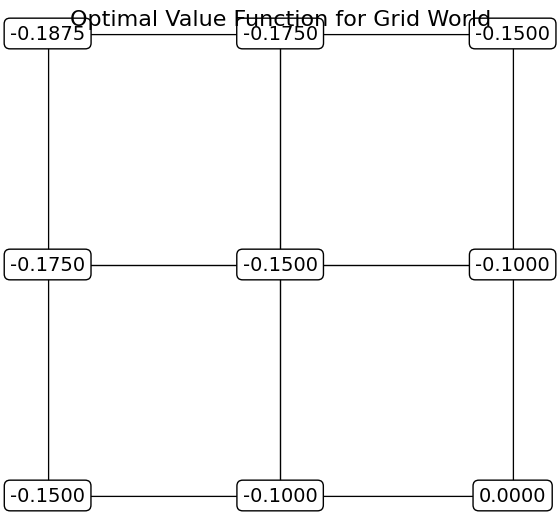

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Grid values
grid_values = np.array([
    [-0.1875, -0.17500000000000002, -0.15000000000000002],
    [-0.17500000000000002, -0.15000000000000002, -0.1],
    [-0.15000000000000002, -0.1, 0],
])

# Plot the grid
plt.figure(figsize=(6, 6))
for i in range(3):
    for j in range(3):
        plt.text(j, 2 - i, f"{grid_values[i, j]:.4f}",
                 ha="center", va="center", fontsize=14,
                 bbox=dict(facecolor="white", edgecolor="black", boxstyle="round"))
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1)
plt.xticks(range(3), [])
plt.yticks(range(3), [])
plt.title("Optimal Value Function for Grid World", fontsize=16)
plt.show()


In [27]:
# Policy Iteration Implementation
import numpy as np

# Define the MDP components
states = [(i, j) for i in range(3) for j in range(3)]
actions = ["up", "down", "left", "right"]
discount_factor = 0.5

# Rewards
rewards = {s: -0.1 for s in states}
rewards[(2, 2)] = 1

# Transition probabilities
def transition_probabilities(state, action):
    i, j = state
    if state == (2, 2):
        return [(state, 1.0)]

    if action == "up":
        next_state = (max(i - 1, 0), j)
    elif action == "down":
        next_state = (min(i + 1, 2), j)
    elif action == "left":
        next_state = (i, max(j - 1, 0))
    elif action == "right":
        next_state = (i, min(j + 1, 2))

    return [(next_state, 1.0)]

# Policy Iteration
def policy_iteration(states, actions, rewards, gamma, theta=1e-6):
    # Step 1: Initialize a random policy
    policy = {s: np.random.choice(actions) for s in states if s != (2, 2)}
    policy[(2, 2)] = None  # No action needed for the terminal state

    # Initialize value function
    V = {s: 0 for s in states}

    while True:
        # Step 2: Policy Evaluation
        while True:
            delta = 0
            new_V = V.copy()
            for state in states:
                if state == (2, 2):
                    continue

                action = policy[state]
                value = 0
                for next_state, prob in transition_probabilities(state, action):
                    value += prob * (rewards[state] + gamma * V[next_state])

                new_V[state] = value
                delta = max(delta, abs(new_V[state] - V[state]))

            V = new_V
            if delta < theta:
                break

        # Step 3: Policy Improvement
        policy_stable = True
        for state in states:
            if state == (2, 2):
                continue

            old_action = policy[state]
            action_values = {}
            for action in actions:
                value = 0
                for next_state, prob in transition_probabilities(state, action):
                    value += prob * (rewards[state] + gamma * V[next_state])
                action_values[action] = value

            # Choose the best action
            best_action = max(action_values, key=action_values.get)
            policy[state] = best_action

            if old_action != best_action:
                policy_stable = False

        if policy_stable:
            break

    return policy, V

optimal_policy, optimal_values = policy_iteration(states, actions, rewards, discount_factor)

# Print results
print("Optimal Policy:")
for i in range(3):
    print([optimal_policy.get((i, j), None) for j in range(3)])

print("\nOptimal Values:")
for i in range(3):
    print([optimal_values[(i, j)] for j in range(3)])


Optimal Policy:
['down', 'down', 'down']
['down', 'down', 'down']
['right', 'right', None]

Optimal Values:
[-0.1875, -0.17500000000000002, -0.15000000000000002]
[-0.17500000000000002, -0.15000000000000002, -0.1]
[-0.15000000000000002, -0.1, 0]


## Logical Agent & First Order Logic

In [35]:
from sympy.logic.boolalg import And, Or, Not
from sympy.abc import A, B

# Propositional Logic Example
expr = And(A, Or(Not(A), B))
print(expr.simplify())

A & B


## Automatic Language (AL)

### Text Preprocessing

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download resources
# nltk.download()
# nltk.download('punkt')
# nltk.download('stopwords')

# Sample text
text = "Natural Language Processing enables machines to understand human language."

# Tokenization
tokens = word_tokenize(text)
print("Tokens:", tokens)

# Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("Filtered Tokens:", filtered_tokens)

Tokens: ['Natural', 'Language', 'Processing', 'enables', 'machines', 'to', 'understand', 'human', 'language', '.']
Filtered Tokens: ['Natural', 'Language', 'Processing', 'enables', 'machines', 'understand', 'human', 'language', '.']


### Sentiment Analysis

In [2]:
from textblob import TextBlob

# Sample text
text = "The product is fantastic! I love it."
blob = TextBlob(text)

# Sentiment Analysis
sentiment = blob.sentiment
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

Polarity: 0.5, Subjectivity: 0.75
